# **_Time Series Prediction_**
### __*Testing Different Methods of Time Series Prediction*__

<br>

### __*Import Libraries*__
### __*[DataTable](https://datatable.readthedocs.io/en/latest/start/quick-start.html)*__


In [1]:
# Datasets
import datatable as dt
import matplotlib.pyplot as plt

# Fuzzy Time Series
from pyFTS.benchmarks import Tests
from pyFTS.models import chen
from pyFTS.models import hofts
from pyFTS.partitioners import Grid
from pyFTS.partitioners import Singleton

<br>

### __*Preparation of the [Weather](https://www.kaggle.com/datasets/ananthr1/weather-prediction) Data*__

In [2]:
# Show structure of dataset
weather_raw = dt.fread('data/seattle-weather.csv').to_pandas()
weather_raw.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


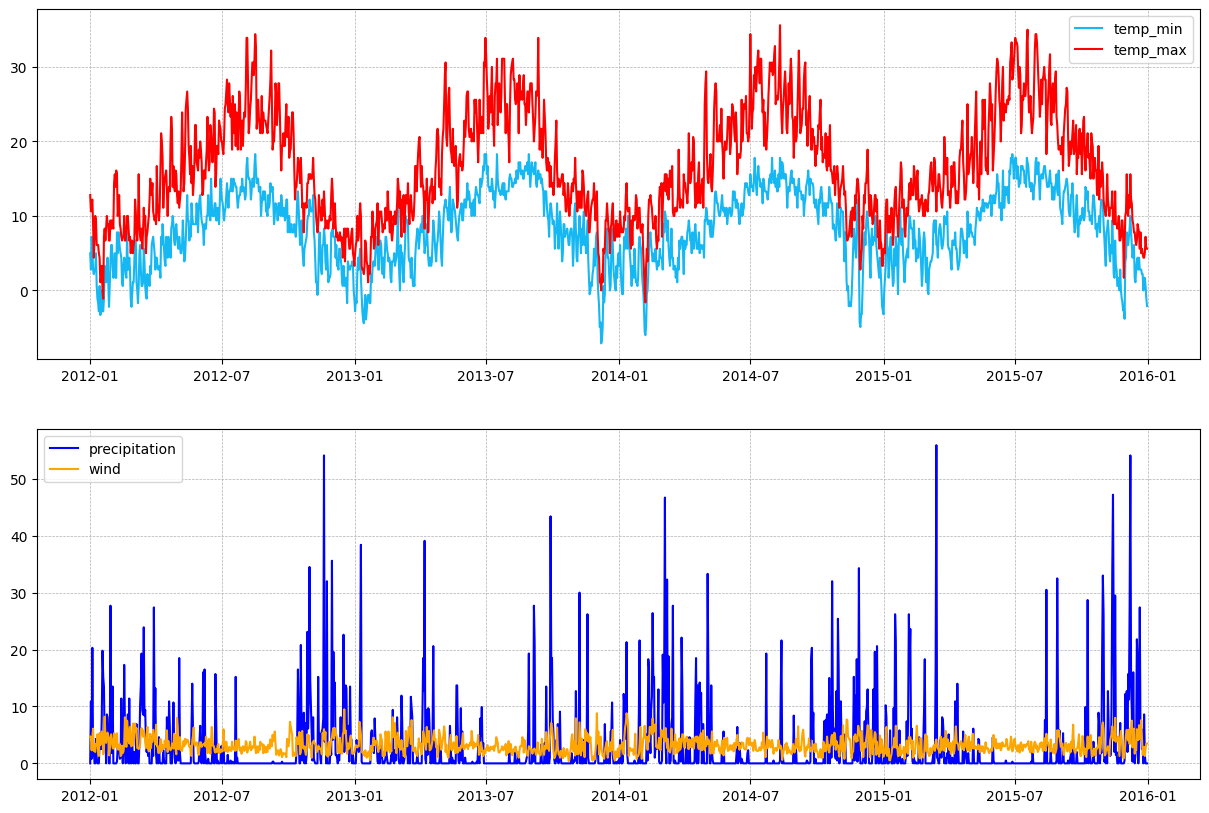

In [3]:
fig_weather, axs_weather = plt.subplots(nrows=2, ncols=1, figsize=[15,10])

min_plot, = axs_weather[0].plot(weather_raw['date'], weather_raw['temp_min'],
                                label='temp_min', color='#16b8f3')
max_plot, = axs_weather[0].plot(weather_raw['date'], weather_raw['temp_max'],
                                label='temp_max', color='red')

precipitation, = axs_weather[1].plot(weather_raw['date'], weather_raw['precipitation'],
                                 label='precipitation', color='blue')
wind_plot, = axs_weather[1].plot(weather_raw['date'], weather_raw['wind'],
                                 label='wind', color='orange')

axs_weather[0].grid(linestyle='--', linewidth=0.5)
axs_weather[0].legend(handles=[min_plot, max_plot])
axs_weather[1].grid(linestyle='--', linewidth=0.5)
axs_weather[1].legend(handles=[precipitation, wind_plot])

In [4]:
# Split the dataset at
split_weather = 366

<br>

### __*Testing the ConventionalFTS Model*__

In [5]:
# Load the dataset
data_ConvFTS = weather_raw['temp_min'].to_list()
# data_ConvFTS = weather_raw[['temp_min','temp_max']].to_numpy()

# Split the dataset into training and testing sets
train_data_ConvFTS = data_ConvFTS[:split_weather]
test_data_ConvFTS = data_ConvFTS[split_weather:split_weather+50]

In [6]:
# Grid Fuzzyfication
grid_ConvFTS = Grid.GridPartitioner(data=train_data_ConvFTS, npart=100)

# Create the Model
model_grid_ConvFTS = chen.ConventionalFTS(partitioner=grid_ConvFTS)
model_grid_ConvFTS.fit(train_data_ConvFTS)

# print(model)

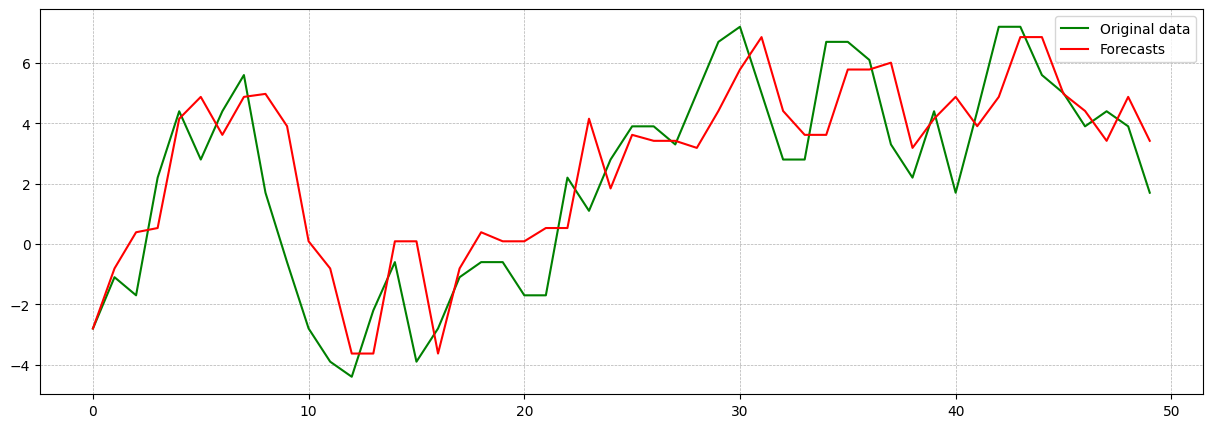

In [7]:
point_pred_grid_ConvFTS = Tests.point_predictions(model_grid_ConvFTS, test_data_ConvFTS)

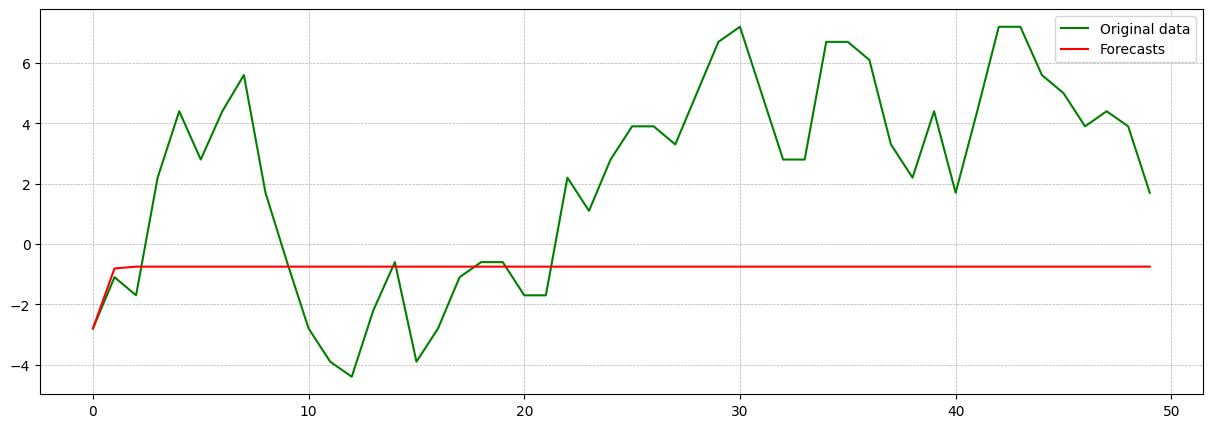

In [8]:
real_pred_grid_ConvFTS = Tests.real_predictions(model_grid_ConvFTS, test_data_ConvFTS)

In [9]:
# Singleton Fuzzyfication
singleton_ConvFTS = Singleton.SingletonPartitioner(data=train_data_ConvFTS)

# Create the Model
model_singleton_ConvFTS = chen.ConventionalFTS(partitioner=singleton_ConvFTS)
model_singleton_ConvFTS.fit(train_data_ConvFTS)

# print(model)

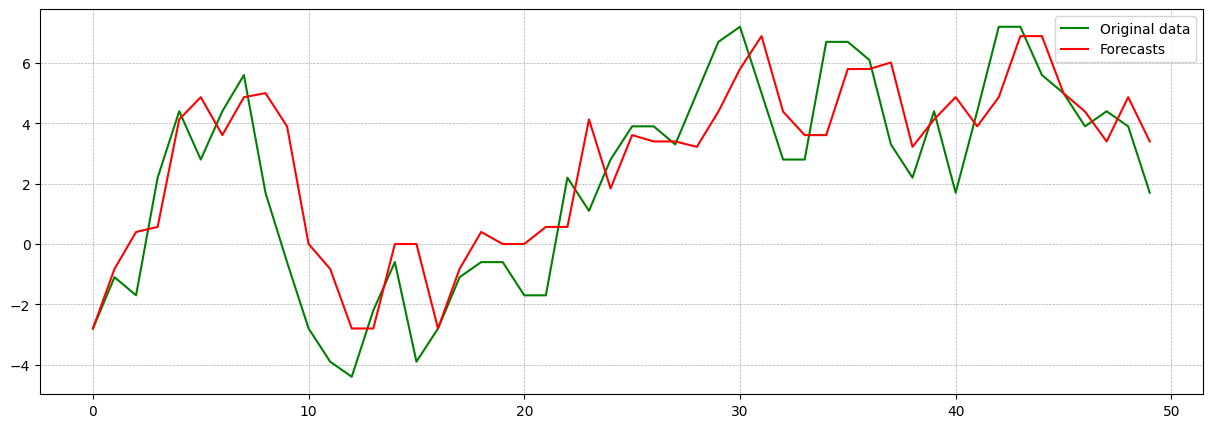

In [10]:
point_pred_singleton_ConvFTS = Tests.point_predictions(model_singleton_ConvFTS, test_data_ConvFTS)

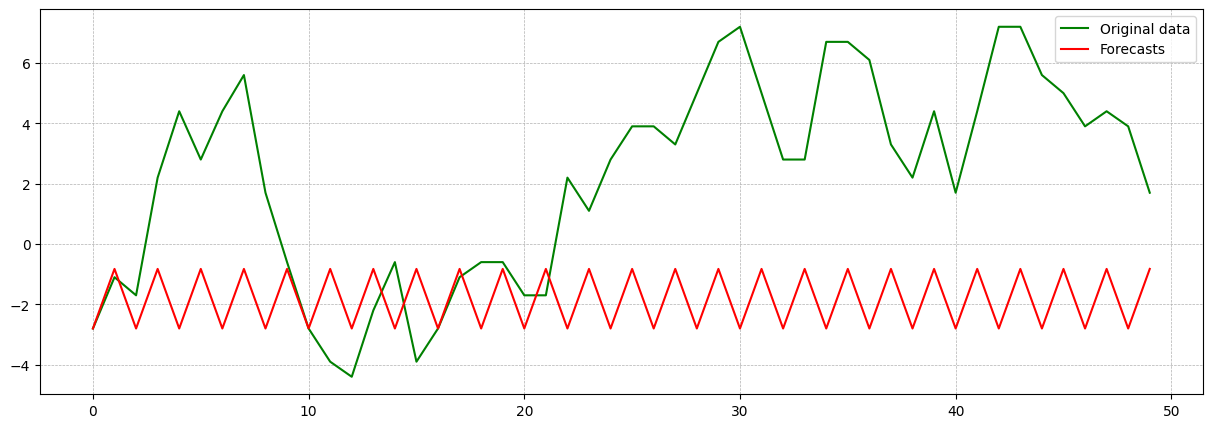

In [11]:
real_pred_singleton_ConvFTS = Tests.real_predictions(model_singleton_ConvFTS, test_data_ConvFTS)

<br>

### __*Testing the High-OrderFTS Model*__

In [12]:
# Load the dataset
data_HFTS = weather_raw['temp_min'].to_list()
# data_ConvFTS = weather_raw[['temp_min','temp_max']].to_numpy()

# Split the dataset into training and testing sets
train_data_HFTS = data_HFTS[:split_weather]
test_data_HFTS = data_HFTS[split_weather:split_weather+50]

In [13]:
# Grid Fuzzyfication
grid_HFTS = Grid.GridPartitioner(data=train_data_HFTS, npart=50)  # play with n-part

# Set the number of lags for the model
lags_grid_HFTS = 2

# Create the Model
model_grid_HFTS = hofts.HighOrderFTS(partitioner=grid_HFTS, order=lags_grid_HFTS)
model_grid_HFTS.fit(train_data_HFTS)

#TODO: RMSE
# print(f' RMSE Error: {test_data_HFTS[lags_HFTS-1:]} {point_pred_HFTS}')
# print(model)

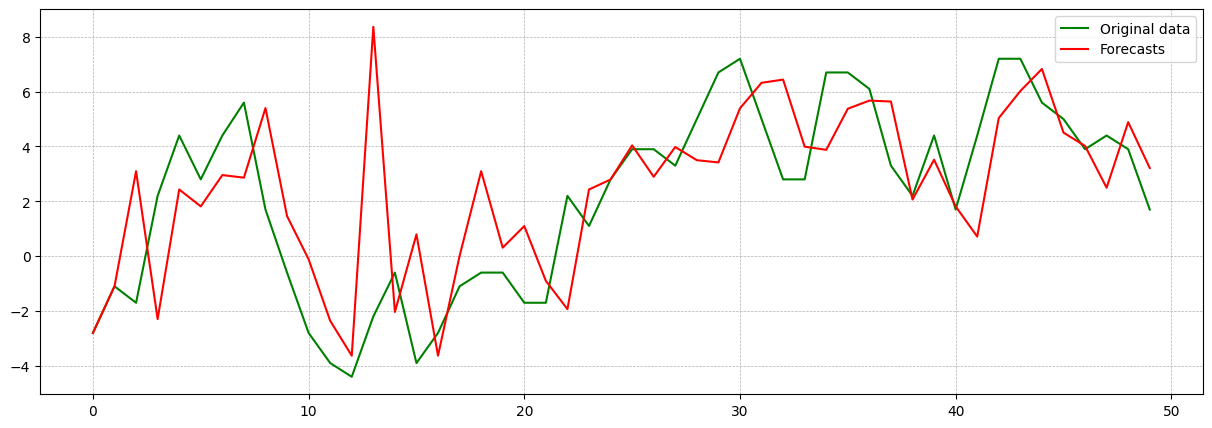

In [14]:
point_pred_grid_HFTS = Tests.point_predictions(model_grid_HFTS, test_data_HFTS, step=lags_grid_HFTS)

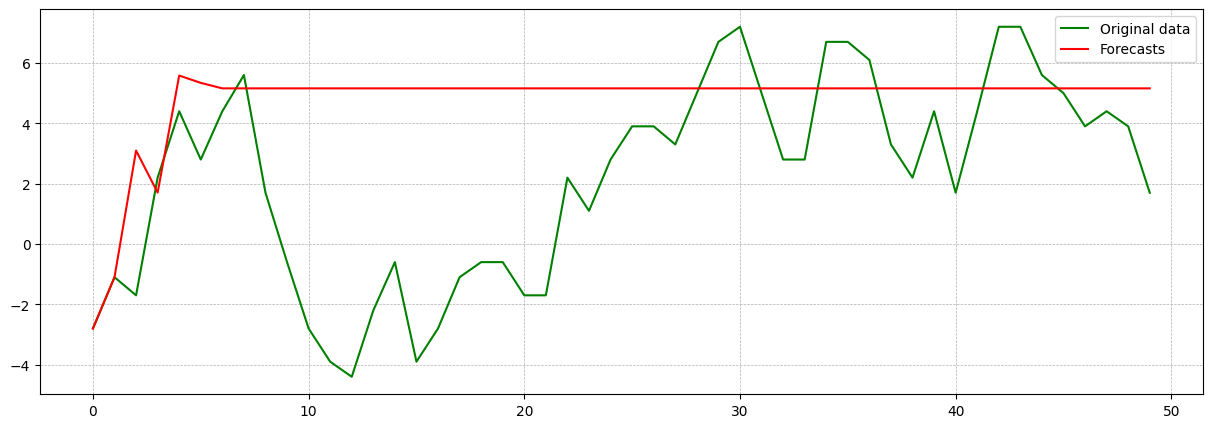

In [15]:
real_pred_grid_HFTS = Tests.real_predictions(model_grid_HFTS, test_data_HFTS, step=lags_grid_HFTS)

In [16]:
# Singleton Fuzzyfication
singleton_HFTS = Singleton.SingletonPartitioner(data=train_data_HFTS)

# Set the number of lags for the model
lags_singleton_HFTS = 2

# Create the Model
model_singleton_HFTS = hofts.HighOrderFTS(partitioner=singleton_HFTS, order=lags_singleton_HFTS)
model_singleton_HFTS.fit(train_data_HFTS)

# print(model)

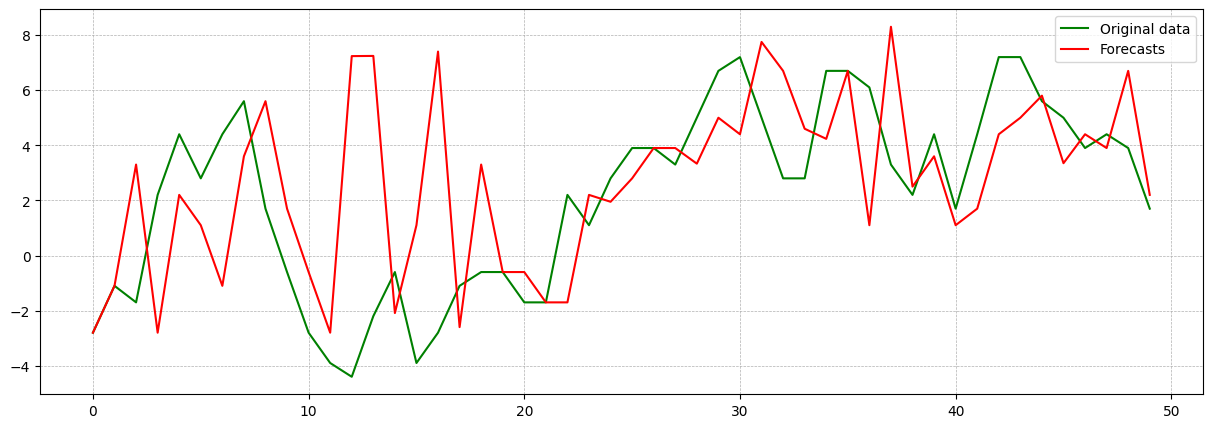

In [17]:
point_pred_singleton_HFTS = Tests.point_predictions(model_singleton_HFTS, test_data_HFTS, step=lags_singleton_HFTS)

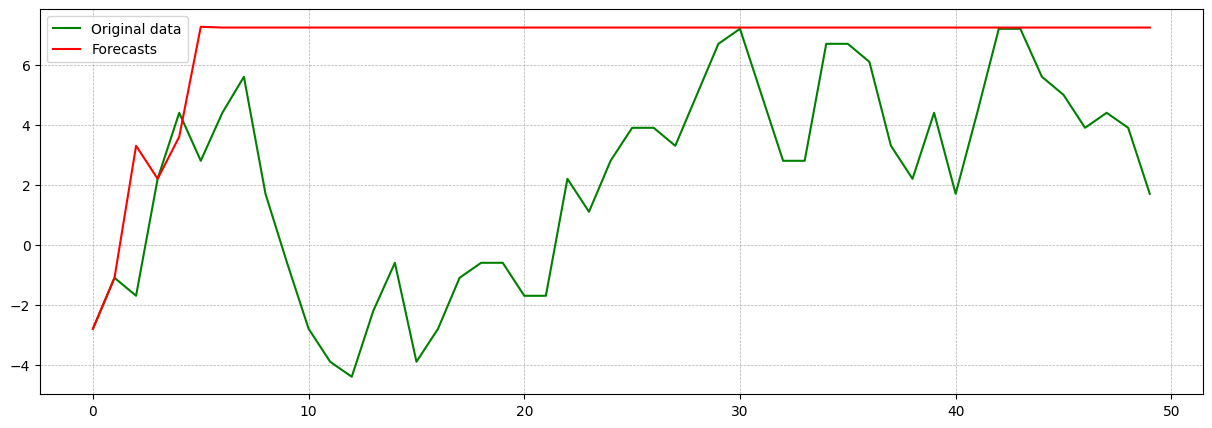

In [18]:
real_pred_singleton_HFTS = Tests.real_predictions(model_singleton_HFTS, test_data_HFTS, step=lags_singleton_HFTS)